<img src='https://raw.githubusercontent.com/alexisuaguilaru/WebScraping_CIAFactbook/refs/heads/main/Resources/Proyecto03_EDA_AlexisAguilar.png' alt='cover'>

# Introduction

The following notebook aims to develop the facts and evidence to show whether there is a relationship between `gdp` and `internet_percent`, that is, the main questions of the study [[1]](#references). For this, a [Data Cleaning](#2-data-clean) is performed to discard some countries, mainly islands, which do not contribute much information to the discussion.

Afterwards, a simple study of the variables to be used to reveal the salient facts and their impact in a more real context is carried out in [Univariate Analysis](#3-univariate-analysis-of-gdp-and-internet_users). And finally to test the relationship of the study by means of hypothesis tests based on the correlation of two variables are presented in [Relationship between `gdp` and `internet_percent`](#4-relationship-between-gdp-and-internet_percent) and [Relationship between `gdp` and `internet_percent by Type of Incomde](#5-relationship-between-gdp-and-internet_percent-by-type-of-income).

# 0. Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Other code 

import SourceExploratoryDataAnalysis as src

PATH_DATASET = '../Dataset/'
RANDOM_STATE = 8013

# 1. Load Dataset

The final dataset after applying the data wrangling operations is loaded for cleaning and analysis of your data of interest.

In [3]:
WorldFactbook_Dataset = pd.read_csv(PATH_DATASET+'Dataset.csv')

WorldFactbook_Dataset.sample(5,random_state=RANDOM_STATE)

,name,area,population,gdp,unemployment,taxes,debt,exchange_rates,internet_users,internet_percent,airports,merchant_marine,military_expenditures,image_urls,gdp_encode
232,Turkmenistan,488100.0,5744151.0,1.315760e+11,4.3,14.9,3.696000e+09,4.125,120627171.0,21.0,23.0,73.0,1.90,https://www.cia.gov/the-world-factbook/static/...,low-income
24,Benin,112622.0,14697052.0,5.251000e+10,1.7,17.1,6.309000e+09,606.345,470305664.0,32.0,10.0,6.0,0.70,https://www.cia.gov/the-world-factbook/static/...,low-income
202,Sierra Leone,71740.0,9121049.0,2.567100e+10,3.1,15.6,1.451000e+09,21.305,191542029.0,21.0,8.0,584.0,0.60,https://www.cia.gov/the-world-factbook/static/...,low-income
85,The Gambia,11300.0,2523327.0,7.911000e+09,6.5,20.3,9.024210e+08,61.096,116073042.0,46.0,1.0,15.0,0.60,https://www.cia.gov/the-world-factbook/static/...,low-income
133,Libya,1759540.0,7361263.0,9.116100e+10,18.6,51.6,6.712000e+09,4.832,655152407.0,89.0,75.0,96.0,1.65,https://www.cia.gov/the-world-factbook/static/...,low-income


# 2. Data Cleaning

Because several of the data related to islands are not relevant to the study, they are to be discarded; these islands are satisfied that either of their two values in `gdp` or `internet_percent` are `0`.

Therefore, the main data cleaning becomes the elimination of these data that do not contribute much to the discussion about the relationship of these two attributes.

In [4]:
# Defining useful variables

gdp = 'gdp'
internet_percent = 'internet_percent'
type_income = 'gdp_encode'

In [5]:
# Dropping countries with `0` values in `gdp` or `internet_users`

WorldFactbook_Dataset_Clean = WorldFactbook_Dataset.query(f"0 < {gdp} & 0 < {internet_percent}")

# 3. Univariate Analysis of `gdp` and `internet_users`

## 3.1 Analysis of `gdp`

As expected, many of the countries will tend to have a low GDP, this is related to the distribution of global wealth; therefore, there are countries with very high incomes that could be considered, theoretically, outliers. To reduce this phenomenon, the `log10` function is applied, thus generating a distribution that tends to be normal instead of exponential.

Using the Shapiro-Wilk test for normality of data, it is found that, by the p-value, the transformed data follow a normal distribution. This will allow to apply parametric tests on the correlation of two variables.

Without transforming the data, the mean is equal to $0.8569$ trillions, showing that most of the countries have low incomes or are in a state of poverty. But there are very extreme cases, this when considering the standard deviation reported.

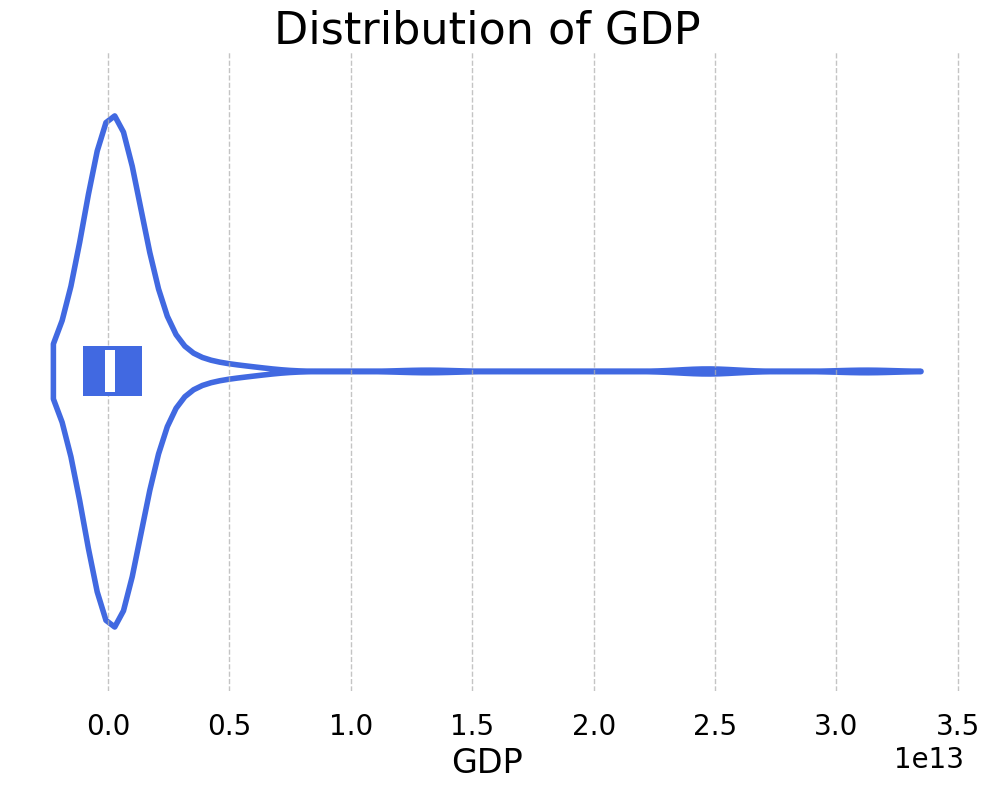

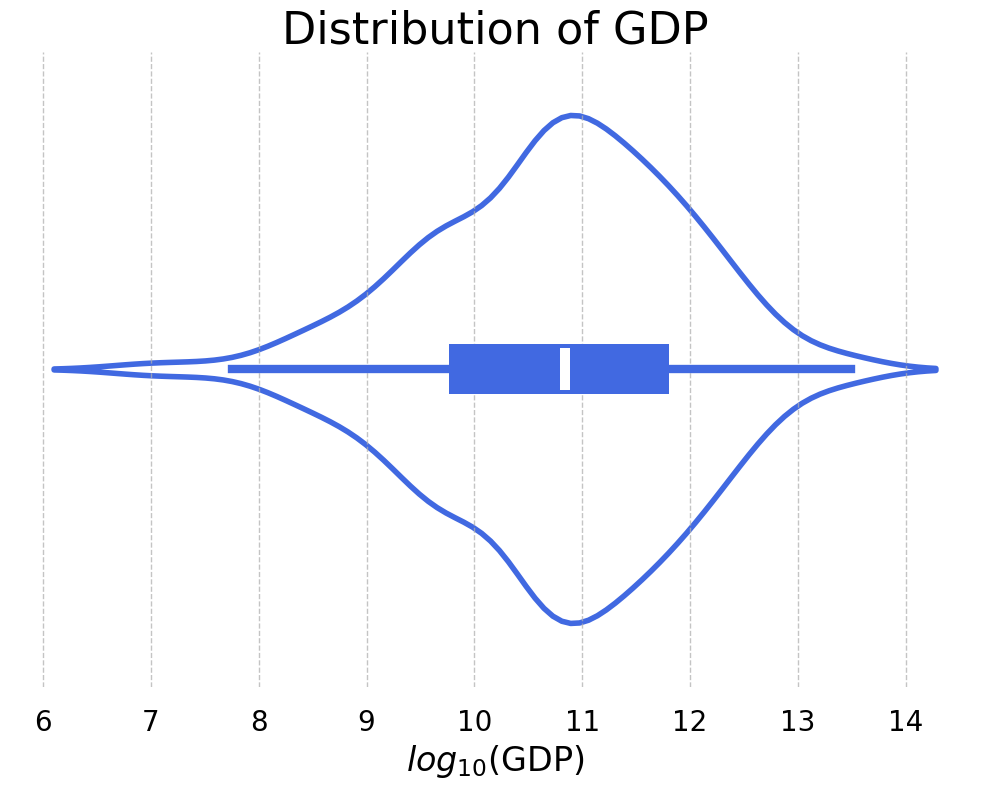

In [6]:
_plot = src.PlotUnivariateFeature(WorldFactbook_Dataset_Clean,gdp,False)
_plot_log10 = src.PlotUnivariateFeature(WorldFactbook_Dataset_Clean,gdp)

In [7]:
_result = stats.shapiro(np.log10(WorldFactbook_Dataset_Clean[gdp]))

print(f'P-value of Shapiro-Wilk Test: {_result.pvalue}')

P-value of Shapiro-Wilk Test: 0.04944145195831236


In [8]:
src.DescriptiveAnalysis(WorldFactbook_Dataset_Clean,gdp)

,gdp
mean,8.531148e+11
std,3.321130e+12
25%,9.984000e+09
50%,6.885400e+10
75%,3.704100e+11


## 3.1 Analysis of `internet_percent`

Noting that the distribution has a negative skew, it can be said that Internet accessibility has increased, in the sense that most countries will tend to have high Internet coverage among their population.

The latter represents that the values are concentrated in a reduced range of values, implying that its variance tends to be low, although it has a high value ($25.54%) but this is due to the outliers or countries that do not have sufficient infrastructure for Internet access.

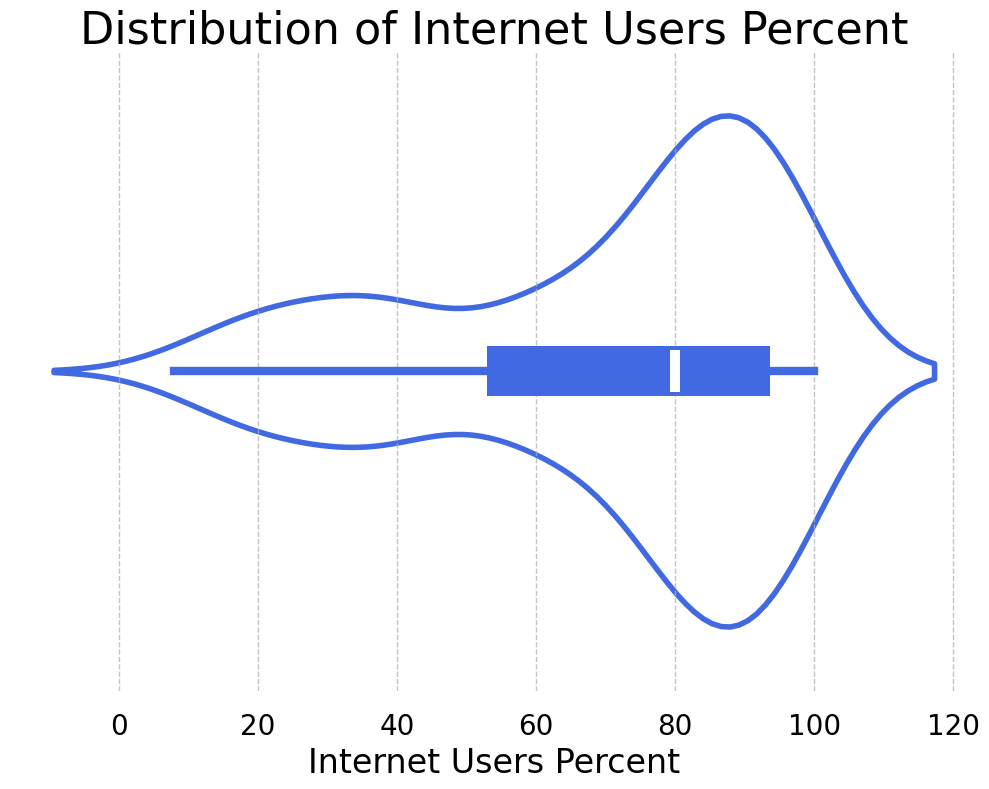

In [9]:
_plot = src.PlotUnivariateFeature(WorldFactbook_Dataset_Clean,internet_percent,False)

In [10]:
src.DescriptiveAnalysis(WorldFactbook_Dataset_Clean,internet_percent)

,internet_percent
mean,70.631390
std,25.499592
25%,56.500000
50%,80.000000
75%,90.000000


# 4. Relationship Between `gdp` and `internet_percent`

The Pearson Correlation Test is used to prove that the correlation is statistically significant in order to show that this relationship exists.

By using the `gdp` values without transforming, it is proved that they have a statistically significant correlation. This implies that as a country's purchasing power increases so does Internet access and this makes sense because there is more investment in telecommunications infrastructure in both the public and private sectors.

P-value of Pearson Correlation Test: 0.0652


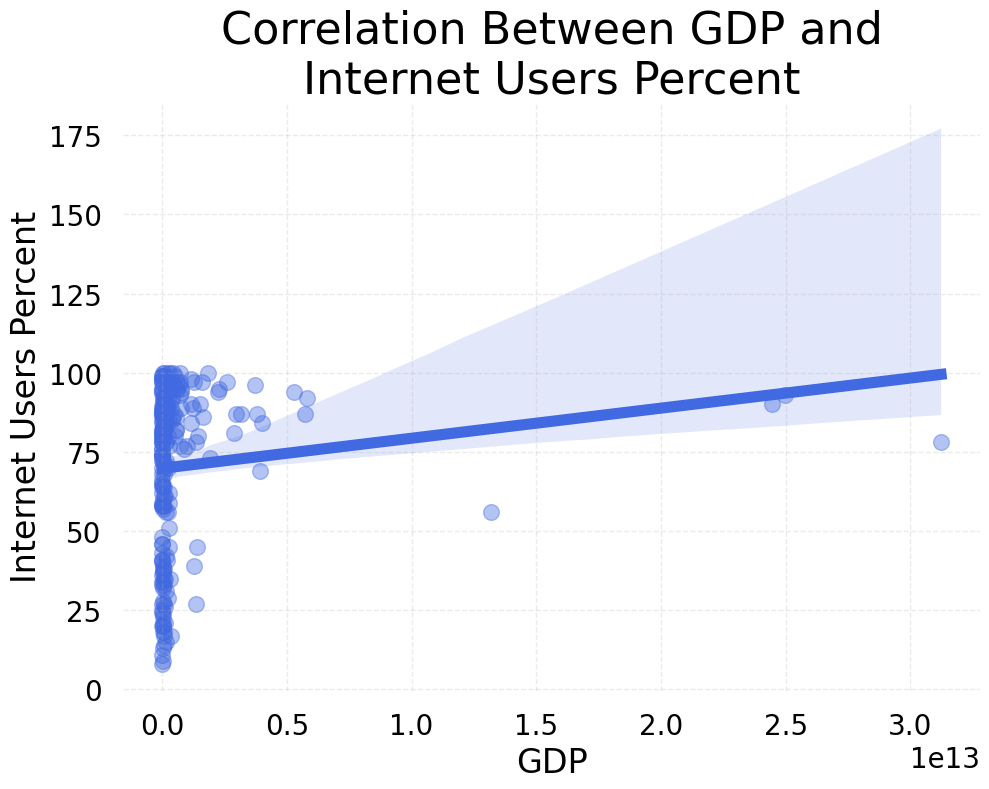

In [11]:
_plot = src.PlotBivariateFeatures(WorldFactbook_Dataset_Clean,gdp,internet_percent,False)

_result = stats.pearsonr(WorldFactbook_Dataset_Clean[gdp],WorldFactbook_Dataset_Clean[internet_percent])
print(f"P-value of Pearson Correlation Test: {_result.pvalue:.4f}")

# 5. Relationship Between `gdp` and `internet_percent` by Type of Income

Repeating the use of Pearson Correlation Test, it is shown that there is a significant correlation when income is medium and high, due to how GDP values accumulate in these two categories, which are at high `internet_percent` values. The fact that there is no significant correlation when income is low can be related to the fact that countries are shown to be uniformly distributed over the different values of `internet_percent`.

Therefore, it can be said that GDP, from a certain threshold, does have an influence on Internet access but reaches a saturation limit, due to the correlation when there is income (although there is not enough evidence, countries, to affirm this), GDP ceases to have an influence.

Low Income
P-value of Pearson Correlation Test: 0.0001

Average Income
P-value of Pearson Correlation Test: 0.2946

High Income
P-value of Pearson Correlation Test: 0.7856



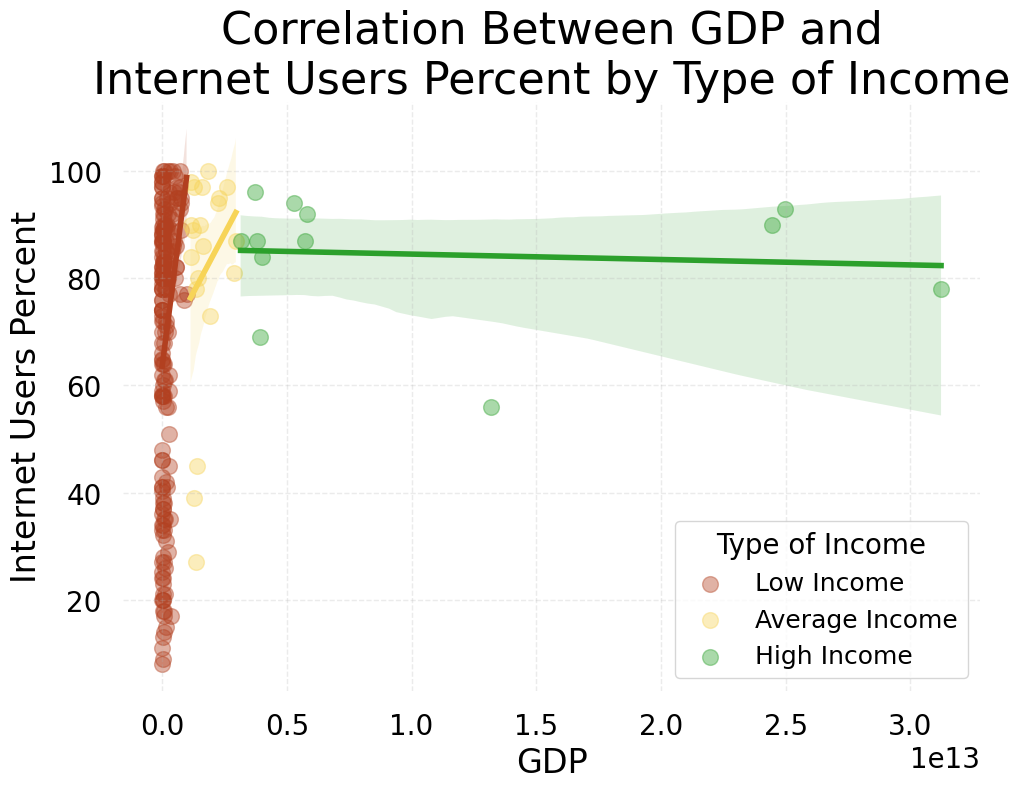

In [12]:
_plot = src.PlotHueBivariateFeatures(WorldFactbook_Dataset_Clean,gdp,internet_percent)

for _type_income in WorldFactbook_Dataset_Clean[type_income].unique():
    _data = WorldFactbook_Dataset_Clean.query(f"{type_income} == '{_type_income}'")
    _result = stats.pearsonr(_data[gdp],_data[internet_percent])
    print(f'{' '.join(map(str.capitalize,_type_income.split('-')))}')
    print(f"P-value of Pearson Correlation Test: {_result.pvalue:.4f}\n")

# Conclusions

The most fundamental part of any Exploratory Data Analysis is based on generating new knowledge based on answering questions by means of statistics, both the use of graphs and appropriate tests. Both ideas were used to generate the exhibits in addition to taking care of the general aesthetics of the created plots, always keeping in mind that the information to be presented is communicated.

Finally, what I take most from this project is the way in which the information and data has to be presented or exposed in order to reach the objective of the communication.

# References

* [1] [Proyecto 3: *Web Scraping con Scrapy*](../RequirementsDocument.pdf). Tinoco Martinez Sergio Rogelio
* [2] DataFrame. Pandas. https://pandas.pydata.org/docs/reference/frame.html
* [3] API Reference. Numpy. https://numpy.org/doc/stable/reference/index.html
* [4] API reference. Seaborn. https://seaborn.pydata.org/api.html
* [5] API Reference. Matplotlib. https://matplotlib.org/stable/api/index.html
* [6] Statistical functions. SciPy. https://docs.scipy.org/doc/scipy/reference/stats.html
* [7] API Reference. Marimo. https://docs.marimo.io/api/